# Decision Trees

*Author: Dr. Vasile Rus (vrus@memphis.edu)*

Building a Decision Tree means, as the name implies, generating a tree in which each internal node of the tree is a decision point usually deciding which of that node's children to consider next based on the values of the predictor or feature associated with the current node. The goal is to reach a leaf node which corresponds to a predictions, for instance, the category of the object/instance described by the predictors/features. An example of such a tree is given below, just for illustration purposes. It uses two decision nodes (the circles/blue nodes): Rainy, which has two values Yes and No, and Fit, which has two values as well Yes - meaning being fit to play - and No - not being fit to play for whatever reason, medical or not. The leaf nodes at the bottom correspond to the outcomes: Play or No-Play. For instance, if it is NOT Rainy and Fit is Yes the decision in the corresponding leaf node is Play. That is, a path from the root/top node to a leaf node illustrates a decision path resulting in the decision shown in the leaf node. Each path in decision trees can be expressed as an IF-THEN, for instance: IF (Rainy == No) AND (Fit == Yes) THEN Play.

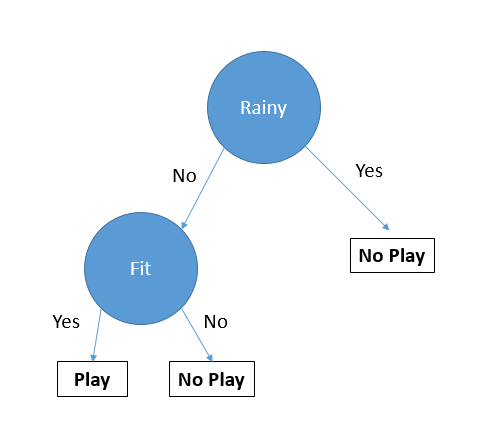

Let's see how we can derive such a decision tree from data. As a simple example, we consider the artificially created dataset below:

$$ data = ((0,0,0), (0,1,1), (1,1,0), (1,0,0))$$

In this dataset, there are three instances. Each instances has two predictors, say $predictor_1$ and $predictor_2$, which are the first values in each instance. $Predictor_1$ could indicate whether it is rainy (1) or not (0) whereas $predictor_2$ may indicate whether a person feels fit (1) to play, say, tennis or not (0). The last value in each instance is the class: 0 (no play) or 1 (play).

The Python code below illustrates how to build a decision tree based on this simple data.

In [43]:
from sklearn import tree
X = [[0, 0], [0, 1], [1,1], [1,0]]
Y = [0, 1, 0, 0]
decisionTreeExample = tree.DecisionTreeClassifier()
decisionTreeExample = decisionTreeExample.fit(X, Y)

We will now generate a visualization of the tree to interpret the output of the decision tree training algorithm which is the inferred decision tree based on the data.

In [45]:
tree.plot_tree(decisionTreeExample)

[Text(297.6, 308.0, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'), Text(198.4, 184.79999999999998, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(99.2, 61.599999999999966, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(297.6, 61.599999999999966, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(396.8, 184.79999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

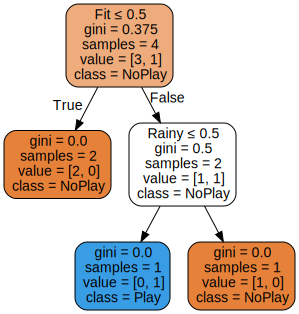

In [24]:
# fancier way of displaying the tree
# this section is commented out as graphviz was not installed as of 6/7/2020
import graphviz 

dot_data = tree.export_graphviz(decisionTreeExample, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Simple-Decision-Tree") 

dot_data = tree.export_graphviz(decisionTreeExample, out_file=None, 
                      feature_names=['Rainy','Fit'],  
                      class_names=['NoPlay','Play'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Decision Trees - Theoretical Background

Building a decision tree means deciding which predictor/feature should correspond to which node of the tree and which predictions should correspond to which terminal nodes or leaf nodes of the tree. The predictions in the leaf nodes could be in the form of a class label as Decision Trees are usually used for classificaition. The tree is so constructed that predictors that better split the instances according to some criterion such as information gain (IG; to be discussed shortly) are placed higher in the decision tree. The net effect of such a strategy is to minimize the depth of the tree, i.e., to make the tree as flat as possible.

The general algorithm to infer a particular Decision Tree (i.e., a particular configuration of internal and leaf nodes arranged in a tree) for a given dataset is the following:

1. Select the best predictor based on some criterion such as Information Gain (discussed shortly)
2. Split the data set into subsets based on the values of the chosen predictor in Step 1.
3. Repeat the above process for the subsets until one of the following conditions is met:
 - all the instances in the subset belong to the same class.
 - there are no more predictors/features left.
 - no more instances.

The most widely used predictor selection criteria are:
 - Entropy
 - Information Gain
 - Gain Ratio
 - Gini Index
 - Chi-square
 - Reduction in Variance

### Entropy and Information Gain

One of the most widely used criteria to guide the construction of Decision Trees is $Information Gain (IG)$ whcih relies on another fundamental concept called $Entropy (E)$. We will define first entropy E and then IG.

*Entropy*

Entropy is a measure of uncertainty or impurity of a set of items. It can also be regarded as a measure of the diversity of a set of items. For instance, in the left urn (Urn A) below there are only red balls. The impurity of this set of balls is 0 - the purity is perfect as all the balls are of the same color (red) or we can say they all belong to class 'red'. The urn on the right (Urn B) has two types of balles - red and blue - and therefore is less pure or more diverse. When drawing balls from Urn A we are certain that the ball is red. When we draw balls from urn B we are less certain whether the ball will be red as we may also draw a blue ball.

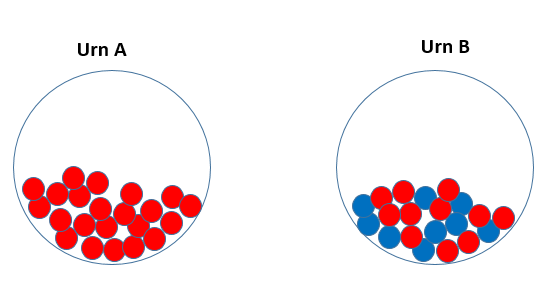

In order to measure this degree of uncertainty, the following formula has been proposed which accounts for the distribution of the possible values/labels/classes/categories C in a set of items S:

$$ E (S) =  \sum \limits _{j=1} ^{C} P(c_j)log_2 P(c_j) $$

In general, the more balanced the distribution of categories in a set of items the higher the entropy. You can see the entropy for a set of items with two categories. 

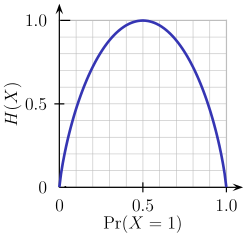

As you can see, the entropy is maximum when the two categories have an equal probability 50-50, e.g., 50% chance of drawing a red ball versus 50% chance of drawing a blue ball. For instance, a set of 30 red balls and 30 blue balls is perfectly balanced and therefore has maximum entropy as opposed to a set with 50 red balls and 10 blue balls in which case the chances/probability of drawing a red balls are much higher.

When we have a set S of items (X,Y) where Y describes possible outcomes and X are the predictors/features/attributes then we can compute the entropy of a partition of S according to the values $v$ of a particular predictor $x$ as in the following:

$$ E (S, x) =  \sum \limits _{v \in x} P(x=v) E(S_v) $$

where $x$ is a predictor from the set of predictors $X$ and $E(S,x)$ is the entropy of the split of the set S into subsets ${S_v}$ according to the values of $x$. As it can be seen, the entropy $E(S,x)$ of such as split is computed as the weighted average of the entropies of each of the subsets $S_v$ corresponding to each of the values $v$ of predictor $x$. The weight corresponds to the probability of that value $P(x=v)$ and is computed as $\frac {|S_v|} {|S|}$. 

*Information Gain*

Information Gain is a selection criterion for predictors and measures how well a predictor can separate the dataset with respect to outcome categories Y. Predictors that separate the dataset into more pure subsets are preferred as they are more informative, i.e., they will lead to more flat (less deep), simpler trees which should generalize better to new instances. Intuitively, you can see in the image below two splits of a set S according to one predictor ($P_i$, bottom left split in the figure) or another ($P_j$, bottom right split).

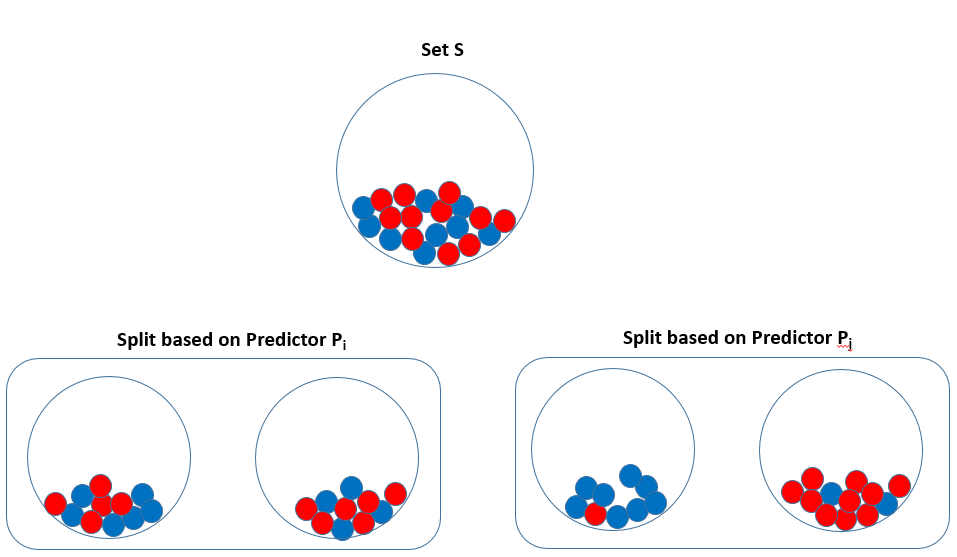

The partition on the right is better as it leads to purer subsets, i.e., the resulting subsets have more balls of the same color.

Information Gain for a predictor $x$ and items set S is defined as:

$$ IG (S,x) = E(S) - E(S,x) $$

which can be expanded based on the previous formulas as follows:

$$ IG (S,x) = E(S) - E(S,x) = \sum \limits _{j=1} ^{C} P(c_j)log_2 P(c_j) - \sum \limits _{v \in x} P(x=v) E(S_v) = \sum \limits _{j=1} ^{C} P(c_j)log_2 P(c_j) - \sum \limits _{v \in x} \frac {|S_v|} {|S|} E(S_v) $$

From the definition, IG can be viewed as a measure quantifying the reduction in entropy of the original dataset versus the entropy of the subsets resulting from splitting the original dataset into subsets based on the values of the predictor $x$.

*ID3 Algorithm*

The ID3  (Iterative Dichotomizer) algorithm selects a decision tree using a top-down greedy search strategy through the space of possible decision trees, i.e., the set or space of all possible trees that can be arranged by assigning the predictors to nodes in all possible combinations. The greedy strategy in ID3 can be summarized as below:
- select from the set of unselected predictors so far the predictor with the highest Information Gain (IG)
- divide the dataset, i.e., the set of instances, into subsets based on the values of the selected attribute
- repeat the above process for each of the subsets until the subset is empty or the subset is homogeneous (contains instances belonging to on class), or no more predictors are available.

We will illustrate the ID3 algorithm on the Iris data set next.

## Building a Decision Tree for the Iris Data Set

We will now exemplify how to build a decision tree for the Iris dataset. The goal is to classify each instance in the dataset using the predictors corresponding to each such instance.

## Load data

In [25]:
import seaborn as sns

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y;QqMX.ksfqmJ/K~J)#:">sns</variable></variables><block type="importAs" id="06NQsrer?lqIYDz:Kf.]" x="20" y="123"><field name="libraryName">seaborn</field><field name="libraryAlias" id="Y;QqMX.ksfqmJ/K~J)#:">sns</field></block></xml>

In [26]:
iris = sns.load_dataset('iris')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w{XYwzJID?zQ##dG@5_m">iris</variable><variable id="Y;QqMX.ksfqmJ/K~J)#:">sns</variable></variables><block type="variables_set" id="Pi,H0EUCG1(j*bt,,-mX" x="-10" y="191"><field name="VAR" id="w{XYwzJID?zQ##dG@5_m">iris</field><value name="VALUE"><block type="varDoMethod" id=":a.t3e,-8!dipmT*odVw"><field name="VAR" id="Y;QqMX.ksfqmJ/K~J)#:">sns</field><field name="MEMBER">load_dataset</field><data>sns:load_dataset</data><value name="INPUT"><block type="text" id="N0eSFcX:_Xobqs9/vr)X"><field name="TEXT">iris</field></block></value></block></value></block></xml>


## Display data

### Tabular

In [27]:
iris.head()

#<xml xmlns="https://developers.google.com/blockly/xml"><block type="dummyNoOutputCodeBlock" id="R61;nGuKUL|ZiG:V#e^w" x="21" y="231"><field name="CODE">iris.head()</field></block></xml>

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Model

### Prepare data

In [28]:
X_iris = iris.drop("species", axis=1)
y_iris = iris["species"]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7Vne2RZ!8Ca*bD2Ac5=:">X_iris</variable><variable id="VC2Q)I0Ee6?e5pwe{ro3">y_iris</variable></variables><block type="variables_set" id="V:1jp`My12h}hp=DATuk" x="-61" y="121"><field name="VAR" id="7Vne2RZ!8Ca*bD2Ac5=:">X_iris</field><value name="VALUE"><block type="dummyOutputCodeBlock" id="1axNyysVGEit7+/MlC%q"><field name="CODE">iris.drop("species", axis=1)</field></block></value><next><block type="variables_set" id="(n?=sYhyyNz9|XhMS1y1"><field name="VAR" id="VC2Q)I0Ee6?e5pwe{ro3">y_iris</field><value name="VALUE"><block type="dummyOutputCodeBlock" id="FR0ZOb$3{Ll%ky#HD8l8"><field name="CODE">iris["species"]</field></block></value></block></next></block></xml>

In [29]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

In [30]:
# trainTest = [X_train, X_test, y_train, y_test] 
trainTest = model_selection.train_test_split(X_iris, y_iris, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="7Vne2RZ!8Ca*bD2Ac5=:">X_iris</variable><variable id="VC2Q)I0Ee6?e5pwe{ro3">y_iris</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-102" y="134"><field name="VAR" id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="uUY%r2L/7acQcS/KbQvx"><mutation items="3"/><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="7Vne2RZ!8Ca*bD2Ac5=:">X_iris</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="VC2Q)I0Ee6?e5pwe{ro3">y_iris</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

### Fit model

In [31]:
from sklearn import tree # Import Decision Tree Classifier

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C~I3L77Oey`%`B19v@mV">naive_bayes</variable></variables><block type="importAs" id="YBlm]aPWC@],I)QF,3g." x="-63" y="204"><field name="libraryName">sklearn.naive_bayes</field><field name="libraryAlias" id="C~I3L77Oey`%`B19v@mV">naive_bayes</field></block></xml>

In [32]:
model = tree.DecisionTreeClassifier()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="[O_:X3*|N1e--mn_rl;j">model</variable><variable id="C~I3L77Oey`%`B19v@mV">naive_bayes</variable></variables><block type="variables_set" id="0{MIimjRn(`+`5M$0_U7" x="-90" y="132"><field name="VAR" id="[O_:X3*|N1e--mn_rl;j">model</field><value name="VALUE"><block type="varCreateObject" id="?`dwaKnOBjnrd}`doxhF"><field name="VAR" id="C~I3L77Oey`%`B19v@mV">naive_bayes</field><field name="MEMBER">GaussianNB</field><data>naive_bayes:GaussianNB</data></block></value></block></xml>

In [33]:
model.fit(trainTest[0], trainTest[2])

y_model = model.predict(trainTest[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="[O_:X3*|N1e--mn_rl;j">model</variable><variable id="R.yRgDyMK6)/O9S-XUci">y_model</variable><variable id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="-94" y="192"><field name="VAR" id="[O_:X3*|N1e--mn_rl;j">model</field><field name="MEMBER">fit</field><data>model:</data><value name="INPUT"><block type="lists_create_with" id="qj[~!aNmN}=v;xQ.=$%L"><mutation items="2"/><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"/><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"/><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block><block type="variables_set" id="W2#bH~%cZ$JYTYX@t`OJ" x="-89" y="291"><field name="VAR" id="R.yRgDyMK6)/O9S-XUci">y_model</field><value name="VALUE"><block type="varDoMethod" id="uF}tgd}f*m!CoCE6Vnfc"><field name="VAR" id="[O_:X3*|N1e--mn_rl;j">model</field><field name="MEMBER">predict</field><data>model:predict</data><value name="INPUT"><block type="lists_create_with" id="g4~yox0A5a]I|VUV:ff9"><mutation items="1"/><value name="ADD0"><block type="lists_getIndex" id="D[QG~pcCO~@%*GRtEXGC"><mutation statement="false" at="true"/><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="k]*6kE_B2NOcRC4T2DMa"><field name="VAR" id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</field></block></value><value name="AT"><block type="math_number" id="nwBf+AnSmiv.DN_wSPy("><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

### Measure performance

In [34]:
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs" id="CEkPf]fPOl]|@Gl1lho[" x="-101" y="139"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></xml>

In [35]:
print(metrics.accuracy_score(trainTest[3], y_model))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="R.yRgDyMK6)/O9S-XUci">y_model</variable><variable id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="-102" y="208"><value name="TEXT"><shadow type="text" id=")gVsrXo+bq|?9m0cIU/Y"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="0B;?~qgT4?Xe8I|O=P)%"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:</data><value name="INPUT"><block type="lists_create_with" id="qe7YbU#WU/F|Iuks0C:c"><mutation items="2"/><value name="ADD0"><block type="lists_getIndex" id="13J^-{z`P=,aau/j:VF~"><mutation statement="false" at="true"/><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="m^Z6y-8@L:s!oS)`%iJW"><field name="VAR" id="}*.K9TP5ezgV@5qVZ;sQ">trainTest</field></block></value><value name="AT"><block type="math_number" id="u}VxLP~*Dbl0g4[AO,bL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="|3h,TPit9wg+a;bR[r$P"><field name="VAR" id="R.yRgDyMK6)/O9S-XUci">y_model</field></block></value></block></value></block></value></block></xml>

0.9736842105263158


## Display The Tree

In [36]:
tree.plot_tree(model) 

[Text(198.4, 338.79999999999995, 'X[2] <= 2.6\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'), Text(148.8, 277.2, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'), Text(248.0, 277.2, 'X[3] <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'), Text(99.2, 215.59999999999997, 'X[2] <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]'), Text(49.6, 154.0, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'), Text(148.8, 154.0, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'), Text(99.2, 92.39999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(198.4, 92.39999999999998, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'), Text(148.8, 30.80000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'), Text(248.0, 30.80000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(396.8, 215.59999999999997, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'), Text(347.2, 154.0, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'), 

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()

iris["feature_names"]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

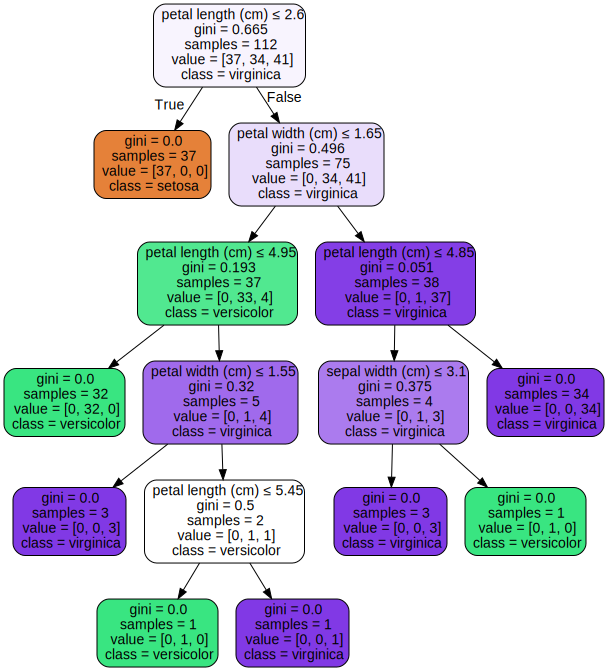

In [38]:
# fancier way of displaying the tree
# this section is commented out as graphviz was not installed as of 6/7/2020
import graphviz 


dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

iris = load_iris()

dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Predict

In [40]:
predicted_class = model.predict([[-1.62 , 1.35, -1.73, -1.45]])
print (predicted_class)

['setosa']
